# Setup 

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import statsmodels.formula.api as smf

In [45]:
df = pd.read_csv("chess_king_rook_dataset.csv")

## Understanding Data

In [46]:
df.dtypes

white_king_file    object
white_king_rank     int64
white_rook_file    object
white_rook_rank     int64
black_king_file    object
black_king_rank     int64
result             object
dtype: object

In [47]:
df['white_king_rank'].unique(), df['white_rook_rank'].unique()

(array([1, 2, 3, 4], dtype=int64),
 array([3, 1, 2, 4, 5, 6, 7, 8], dtype=int64))

Should we keep the rank variable numeric? Seems more categorical (ie 1, 2, etc are row names, not a true continuous variable like height or weight)

In [48]:
df['result'].unique()

array(['draw', 'zero', 'one', 'two', 'three', 'four', 'five', 'six',
       'seven', 'eight', 'nine', 'ten', 'eleven', 'twelve', 'thirteen',
       'fourteen', 'fifteen', 'sixteen'], dtype=object)

draw is a draw, numbers are # of turns to a win

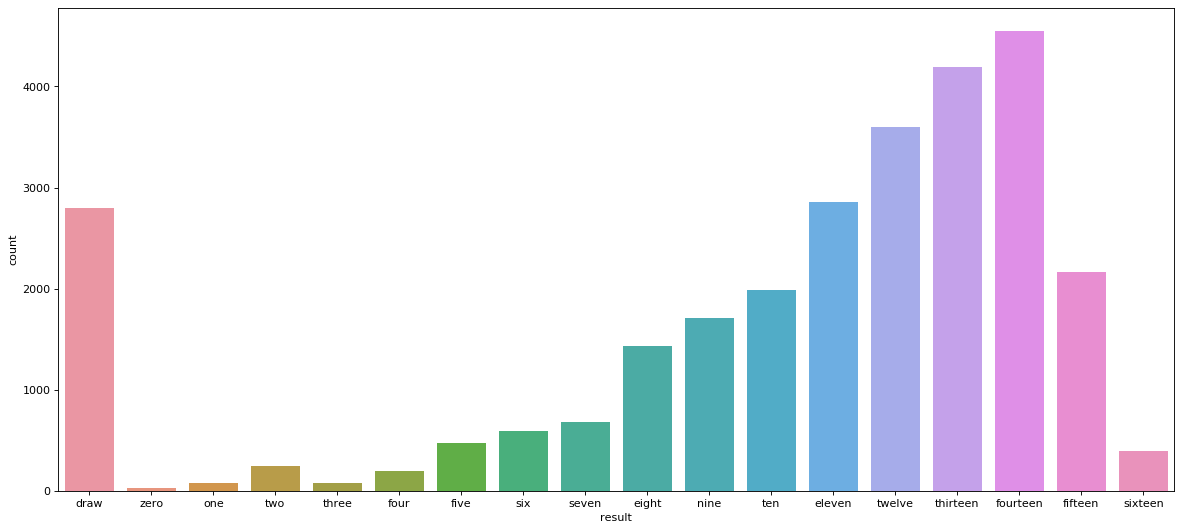

In [49]:
plt.figure(figsize=(18, 8), dpi=80)
sns.countplot(data=df, x='result')

In [50]:
# binary result fits with Santorini (draws aren't possible in that game)
df['win'] = df['result'] != 'draw'
df['win'] = df['win'].astype(int)

In [51]:
df.win.mean() #90%ish are wins

0.9003421727972626

In [53]:
df[['white_king_rank','white_rook_rank', 'white_rook_rank', 'black_king_rank']].corr()

,white_king_rank,white_rook_rank,white_rook_rank,black_king_rank
white_king_rank,1.000000,-0.013167,-0.013167,-0.123987
white_rook_rank,-0.013167,1.000000,1.000000,-0.021274
white_rook_rank,-0.013167,1.000000,1.000000,-0.021274
black_king_rank,-0.123987,-0.021274,-0.021274,1.000000


In [54]:
for col in df.columns:
    if "rank" in col:
        df[col] = df[col].astype(str)

df.dtypes

white_king_file    object
white_king_rank    object
white_rook_file    object
white_rook_rank    object
black_king_file    object
black_king_rank    object
result             object
win                 int32
dtype: object

In [57]:
dummy_df = copy.deepcopy(df)
del dummy_df['result']

In [59]:
dummy_df = pd.get_dummies(dummy_df)
dummy_df['result'] = df['result']

In [68]:
dummy_df.head()

,win,white_king_file_a,white_king_file_b,white_king_file_c,white_king_file_d,white_king_rank_1,white_king_rank_2,white_king_rank_3,white_king_rank_4,white_rook_file_a,...,black_king_file_h,black_king_rank_1,black_king_rank_2,black_king_rank_3,black_king_rank_4,black_king_rank_5,black_king_rank_6,black_king_rank_7,black_king_rank_8,result
0,0,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,draw
1,0,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,draw
2,0,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,draw
3,0,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,draw
4,0,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,draw


In [69]:
df.head()

,white_king_file,white_king_rank,white_rook_file,white_rook_rank,black_king_file,black_king_rank,result,win
0,a,1,b,3,c,2,draw,0
1,a,1,c,1,c,2,draw,0
2,a,1,c,1,d,1,draw,0
3,a,1,c,1,d,2,draw,0
4,a,1,c,2,c,1,draw,0


In [81]:
formula_str = 'win ~ '
col_list = []
for col in df.columns:
    if col != 'result' and col != 'win':
        formula_str += col + ' + '
        col_list.append(col)
    
formula_str = formula_str[0:len(formula_str) - 3] # remove last plus sign    
print(formula_str)

probit_model = smf.probit(data = df, formula = formula_str).fit()
probit_model.summary()

win ~ white_king_file + white_king_rank + white_rook_file + white_rook_rank + black_king_file + black_king_rank
Optimization terminated successfully.
         Current function value: 0.312907
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Probit Regression Results                           
==============================================================================
Dep. Variable:                    win   No. Observations:                28056
Model:                         Probit   Df Residuals:                    28021
Method:                           MLE   Df Model:                           34
Date:                Sat, 05 Jun 2021   Pseudo R-squ.:                 0.03522
Time:                        15:46:38   Log-Likelihood:                -8778.9
converged:                       True   LL-Null:                       -9099.4
Covariance Type:            nonrobust   LLR p-value:                4.021e-113
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                2.1759      0.076     28.506      0.000       2.026       2.326
white_king_file[T.b]     0.0115      0.047      0.243      0.808      -0.081       0.105
white_king_file[T.c]     0.0212      0.047      0.451      0.652      -0.071       0.113
white_king_file[T.d]     0.0262      0.048      0.550      0.583      -0.067       0.120
white_king_rank[T.2]     0.0149      0.026      0.583      0.560      -0.035       0.065
white_king_rank[T.3]     0.0296      0.032      0.918      0.359      -0.034       0.093
white_king_rank[T.4]     0.0138      0.051      0.272      0.785      -0.086       0.113
white_rook_file[T.b]    -0.2029      0.047     -4.362      0.000      -0.294      -0.112
white_rook_file[T.c]    -0.1241      0.048     -2.605      0.009      -0.217      -0.031
white_rook_file[T.d]    -0.2131      0.047     -4.554      0.000      -0.305      -0.121
white_rook_file[T.e]    -0.3218      0.045     -7.128      0.000      -0.410      -0.233
white_rook_file[T.f]    -0.4753      0.044    -10.817      0.000      -0.561      -0.389
white_rook_file[T.g]    -0.5679      0.043    -13.123      0.000      -0.653      -0.483
white_rook_file[T.h]    -0.2872      0.045     -6.341      0.000      -0.376      -0.198
white_rook_rank[T.2]    -0.2224      0.045     -4.974      0.000      -0.310      -0.135
white_rook_rank[T.3]    -0.2362      0.045     -5.298      0.000      -0.324      -0.149
white_rook_rank[T.4]    -0.3213      0.044     -7.325      0.000      -0.407      -0.235
white_rook_rank[T.5]    -0.3485      0.044     -7.985      0.000      -0.434      -0.263
white_rook_rank[T.6]    -0.3285      0.044     -7.490      0.000      -0.414      -0.243
white_rook_rank[T.7]    -0.3031      0.044     -6.873      0.000      -0.389      -0.217
white_rook_rank[T.8]    -0.0067      0.047     -0.141      0.887      -0.100       0.086
black_king_file[T.b]    -0.2303      0.048     -4.840      0.000      -0.324      -0.137
black_king_file[T.c]    -0.2083      0.049     -4.214      0.000      -0.305      -0.111
black_king_file[T.d]    -0.2014      0.048     -4.196      0.000      -0.295      -0.107
black_king_file[T.e]    -0.2078      0.046     -4.517      0.000      -0.298      -0.118
black_king_file[T.f]    -0.2111      0.044     -4.781      0.000      -0.298      -0.125
black_king_file[T.g]    -0.2537      0.044     -5.829      0.000      -0.339      -0.168
black_king_file[T.h]     0.0306      0.045      0.673      0.501      -0.059       0.120
black_king_rank[T.2]    -0.2603      0.045     -5.830      0.000      -0.348      -0.173
black_king_rank[T.3]    -0.2373      0.044     -5.366      0.000      -0.324      -0.151
black_king_rank[T.4]    -0.2753      0.043     -6.357      0.000      -0.360      -0.190
black_king_rank[T.5]    -0.2972      0.043     -6.902      0.000      -0.382      -0.213
black_king_rank[T.6]    -0.3129      0.044     -7.181      0.000      -0.398      -0.228
black_king_rank[T.7]    -0.3370      

white king's ocation seem's meaningless, most of everything else is meaningful

Multinomial probit on result variable is also possible, but would have 17 different models, not very readable

# Sklearn

Won't have time to analyze individual boards in Santorini. Will need to rely on on predictions

## Data Setup

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [97]:
col_list = []
for col in dummy_df.columns:
    if col != 'win' and col != 'result':
        col_list.append(col)

X = dummy_df.loc[:, col_list]
y = dummy_df['win']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

Next piece will remain commented out. Don't need to scale binary variables. But good practice to do it anyway

In [96]:
# scaler = StandardScaler()
# scaler.fit(X_train)
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

In [99]:
from sklearn.svm import SVC
linear_svc = SVC(kernel='linear', random_state=0)
linear_svc.fit(X_train, y_train)
linear_svc.predict(X_test)

array([1, 1, 1, ..., 1, 1, 1])